In [28]:
# 1-11. 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다
'''
1. 데이터셋의 구성을 파악하고, 데이터를 이해하는 과정이 포함되어있는가?
   1) 파악 : In 29
      - Number of Instances: 1797
      - Number of Attributes: 64픽셀로 구성
        . 8x8 image of integer pixels
      - Missing Attribute Values: 결측치 없음

    2) DATA INFO.: In 20, In 3, In 4, In 5, In 6, In 9, In 10, In 12, In 14, In 26, 
      - 학습data : Feature data(In 3,In 10) :1797행이 64개로 구성 
                     >>> 형상정보(In 9) , 64개의 Feature(In 14) , Feature data 이미지(In 26)
      - 정답data :  Label Data(In 31)(정답) : array([0, 1, 2, ..., 8, 9, 8])    
                     >>> 갯수는 1797(In 12)
      - 정답이름 : Target Names(In 5)     : array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
      - 객체(In 6)
      
2. 5가지 모델을 이용하여 학습을 수행하고 결과값을 얻었는가?
   * Precision : (정답율)예측된 true 전체(tp+fp) 중 true 비율(tp) , 모델에서 정답율  , 틀렸는데 맞다고 예측하면 안됨
   * recall    : (재현율)실제 true 자료(tp+fn) 중 true 비율(tp)   , 현실과 맞는 정답율,  맞았는데 틀렸다고 예측하면 안됨
   * f1-score  : (조화평균)정밀도 및 호출의 가중 평균      
   * macro avg : 평균
   * weighed avg : support * 각 결과 반영한 평균 
                                    accuracy     Precision      recall           f1-score
   1) Decision Tree 사용  : In 27      86 양호    86 양호        86 양호      86(weighed avg =85)  양호
   2) Random Forest 사용  : In 22      97 우수    98 우수        97 우수      97(weighed avg =98)  우수
   3) SVM 사용            : In 23      99 우수    99 우수        99 우수      99(weighed avg =99)  우수
   4) SGD Classifier 사용 : In 24      97 우수    98 우수        98 우수      97(weighed avg =97)  우수
   5) Logistic Regression : In 25      98 우수    98 우수        98 우수      98(weighed avg =98)  우수
      중지:총 반복 횟수 한계 도달
   * 우수 : 100-90 , 양호 : 90 - 80 , 보통 : 80 - 70 , 미흡 : 70 - 60 , 저조 : 60 ~    
   
3. 모델의 평가 지표를 선택하고, 그 이유를 근거를 바탕으로 서술하였는가?
   
   결론 : 좋은 모델로의 선정 Precision, recall이 높은 것이 좋다고 생각되어집니다.
          1) 손글씨 인식은 Precision이 중요하다고 판단되며,(맞았다고 했는데 맞은 것의 비율,fp가 적어지면 적을 수록 유리)
             recall보다 우선시 되어야(틀렸다고 했는데 맞는 문자임) 한다고 생각합니다.
          2) svm과 Logistic Regression 알고리즘 중 분류에 우수한 svm 알고리즘을 이용하여 모델을 생성하는 것이 좋다고 생각됩니다.

'''

'\n\n\n'

In [27]:
#1-11. 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다
# (1) 필요한 모듈 import
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# (2) 데이터 준비
digits = load_digits()
digits_data = digits.data
digits_label = digits.target

# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

# (4) 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



0.8555555555555555

In [22]:
#Random Forest 사용해 보기
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        30
           3       0.98      0.98      0.98        41
           4       0.94      0.97      0.95        32
           5       1.00      0.98      0.99        46
           6       1.00      0.97      0.98        32
           7       0.98      1.00      0.99        40
           8       0.93      0.98      0.95        42
           9       1.00      0.93      0.96        29

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360



In [23]:
#SVM 사용해 보기
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

#모델 가져오기
svm_model = svm.SVC()

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        41
           4       0.97      1.00      0.98        32
           5       0.98      1.00      0.99        46
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        40
           8       0.98      0.95      0.96        42
           9       1.00      0.93      0.96        29

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [24]:
#from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDClassifier

#모델 가져오기
sgd_model = SGDClassifier()

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.97      0.92      0.94        36
           2       0.97      1.00      0.98        30
           3       0.95      1.00      0.98        41
           4       0.97      0.97      0.97        32
           5       0.98      0.98      0.98        46
           6       1.00      0.97      0.98        32
           7       0.95      1.00      0.98        40
           8       0.98      0.95      0.96        42
           9       1.00      0.97      0.98        29

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360



In [25]:
#Logistic Regression 사용해 보기
from sklearn.linear_model import LogisticRegression

#모델 가져오기
logistic_model = LogisticRegression()


logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        30
           3       0.98      1.00      0.99        41
           4       0.94      0.97      0.95        32
           5       0.98      0.98      0.98        46
           6       1.00      1.00      1.00        32
           7       0.97      0.97      0.97        40
           8       1.00      0.95      0.98        42
           9       0.96      0.93      0.95        29

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# digits_data와 new_label로 Decision Tree 모델을 학습시키고, 정확도를 확인
# (1) 필요한 모듈 import
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# (2) 데이터 준비
digits = load_digits()

#(3) 데이터 이해하기
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [3]:
#Feature Data 지정하기
digits_data = digits.data
digits_data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [31]:
#Label Data 지정하기
digits_label = digits.target
digits_label

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
#Target Names 출력해 보기
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
#digits = load_digits()

print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [9]:
#형상정보
print(digits_data.shape) 

(1797, 64)


In [10]:
#샘플로 하나의 데이터만 확인
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [12]:
#Target
print(digits_label.shape)
digits_label

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

In [14]:
# 64개의 각 feature
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [16]:
# (4) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

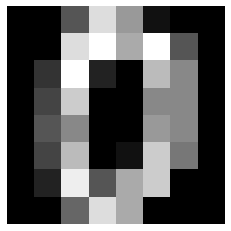

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

In [29]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo